# Chapter 1: Unsupervised Learning

In [1]:
# Measuring model performance
# Using Iris dataset rather than what's used in the videos
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
X = iris.data # [["sepal length (cm)", "sepal width (cm)"]]
y = iris.target

In [2]:
samples = X.values

In [3]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(samples)

KMeans(n_clusters=3)

In [4]:
labels = model.predict(samples)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [5]:
new_labels = model.predict(new_samples)
print(new_labels)

NameError: name 'new_samples' is not defined

In [ ]:
# Scatter plots
import matplotlib.pyplot as plt
xs = samples[:,0]
ys = samples[:,2]
plt.scatter(xs, ys, c=labels)
plt.show()

## Evaluating a clustering

In [6]:
#Aligning labels and species
import pandas as pd
df = pd.DataFrame({'labels': labels, 'species': species})
print(df)

NameError: name 'species' is not defined

In [ ]:
#Crosstab of labels and species
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(samples)
print(model.inertia_)

## Transforming features for better clusterings

In [ ]:
#Clustering the wines
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
labels = model.fit_predict(samples)

In [ ]:
#Clusters vs. varieties
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)

In [ ]:
#sklearn StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(samples)
StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled = scaler.transform(samples)

In [ ]:
#Pipelines combine multiple steps
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)

from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(samples)

labels = pipeline.predict(samples)


### Examples

In [ ]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)
# Fit pipeline to the daily price movements
pipeline.fit(movements)

In [ ]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values(['labels']))

# Chapter 2: Visualizing hierarchies

In [ ]:
#Hierarchical clustering with SciPy
#Given samples (the array of scores), and country_names
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(samples, method='complete')
dendrogram(mergings,
labels=country_names,
leaf_rotation=90,
leaf_font_size=6)
plt.show()

### Examples

In [ ]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=6)
plt.show()

## Cluster labels in hierarchical clustering

In [ ]:
#Extracting cluster labels using fcluster
from scipy.cluster.hierarchy import linkage
mergings = linkage(samples, method='complete')
from scipy.cluster.hierarchy import fcluster
 = fcluster(mergings, 15, criterion='distance')
print(labels)

#Aligning cluster labels with country names
# Given a list of strings country_names :
import pandas as pd
pairs = pd.DataFrame({'labels': labels, 'countries': country_names})
print(pairs.sort_values('labels'))

### Examples

In [7]:
# NOTE: This doesn't seem to have the same number of rows as
#       the samples data in the environment
# Load grains data
import pandas as pd
data = pd.read_csv('data/Grains/seeds.csv', header=None)
data = data.sample(16, replace=False)
samples=data.values[:, 0:7]
grain_ids = data.values[:, 7]
data
# pd.read_csv('data/Grains/seeds-width-vs-length.csv', header=None)

,0,1,2,3,4,5,6,7
174,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,3
161,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,3
168,11.35,13.12,0.8291,5.176,2.668,4.337,5.132,3
53,14.33,14.28,0.8831,5.504,3.199,3.328,5.224,1
104,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,2
170,11.02,13.00,0.8189,5.325,2.701,6.735,5.163,3
45,13.80,14.04,0.8794,5.376,3.155,1.560,4.961,1
79,17.12,15.55,0.8892,5.850,3.566,2.858,5.746,2
96,19.31,16.59,0.8815,6.341,3.810,3.477,6.238,2
200,12.38,13.44,0.8609,5.219,2.989,5.472,5.045,3


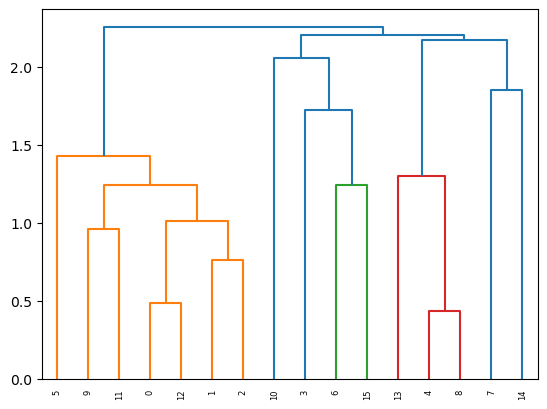

In [8]:
# Perform the necessary imports
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(mergings, labels=np.arange(0, samples.shape[0]), leaf_rotation=90, leaf_font_size=6)
plt.show()

In [9]:
# Perform the necessary imports
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 1.5, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': grain_ids})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  1.0  2.0  3.0
labels                  
1            0    0    7
2            2    0    0
3            1    0    0
4            1    0    0
5            0    3    0
6            0    1    0
7            0    1    0


In [10]:
mergings

array([[ 4.        ,  8.        ,  0.4360699 ,  2.        ],
       [ 0.        , 12.        ,  0.48305109,  2.        ],
       [ 1.        ,  2.        ,  0.76106599,  2.        ],
       [ 9.        , 11.        ,  0.95990854,  2.        ],
       [17.        , 18.        ,  1.0098064 ,  4.        ],
       [19.        , 20.        ,  1.2409082 ,  6.        ],
       [ 6.        , 15.        ,  1.24595636,  2.        ],
       [13.        , 16.        ,  1.30246406,  3.        ],
       [ 5.        , 21.        ,  1.4291321 ,  7.        ],
       [ 3.        , 22.        ,  1.72691831,  3.        ],
       [ 7.        , 14.        ,  1.85493979,  2.        ],
       [10.        , 25.        ,  2.05847637,  4.        ],
       [23.        , 26.        ,  2.1729401 ,  5.        ],
       [27.        , 28.        ,  2.20619345,  9.        ],
       [24.        , 29.        ,  2.25834239, 16.        ]])

In [ ]:
np.linalg.norm(
    samples[
        mergings[0,0].astype(int),
        :
    ] - samples[
        mergings[0, 1].astype(int),
        :
    ]
)

## t-SNE for 2-dimensional maps
t-distributed stochastic neighbor embedding

In [11]:
# Measuring model performance
# Using Iris dataset rather than what's used in the videos
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
X = iris.data # [["sepal length (cm)", "sepal width (cm)"]]
y = iris.target

In [12]:
samples = X.values
species = y.values

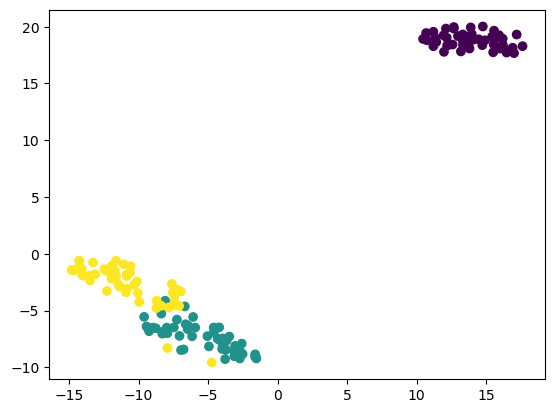

In [13]:
#t-SNE in sklearn
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(samples)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=species)
plt.show()

## Chapter 3

## Visualizing the PCA transformation

In [ ]:
# Measuring model performance
# Using Wine dataset 
from sklearn.datasets import load_wine
wine = load_wine(as_frame=True)
X = wine.data.rename(
    columns = {
        "od280/od315_of_diluted_wines": "od280"
    }
)
y = wine.target

In [ ]:
samples = X[["total_phenols", "od280"]]
samples

In [ ]:
from sklearn.decomposition import PCA
model = PCA()
model.fit(samples)
transformed = model.transform(samples)

print(transformed)

In [ ]:
print(model.components_)

## Intrinsic dimension

In [ ]:
# Iris dataset
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
X = iris.data 
features = ["sepal length (cm)", "sepal width (cm)", "petal width (cm)"]
y = iris.target

In [ ]:
samples = X[features]

In [ ]:
# Plotting the variances of PCA features
# samples = array of versicolor samples
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(samples)
PCA()
features = range(pca.n_components_)

In [ ]:
# Plotting the variances of PCA features
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

### Examples

In [ ]:
# The following was run with a fish data set

# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


## Dimension reduction with PCA

In [ ]:
# Use all features of Iris dataset
iris = load_iris(as_frame=True)
X = iris.data 
y = iris.target
samples = X

In [ ]:
# Dimension reduction of iris dataset
# samples = array of iris measurements (4 features)
# species = list of iris species numbers
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(samples)

transformed = pca.transform(samples)
print(transformed.shape)

In [ ]:
import matplotlib.pyplot as plt
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=species)
plt.show()

In [ ]:
# NOTE (JS): No example data for this cell

# TruncatedSVD and csr_matrix
# scikit-learn PCA doesn't support csr_matrix
# Use scikit-learn TruncatedSVD instead
# Performs same transformation
from sklearn.decomposition import TruncatedSVD
model = TruncatedSVD(n_components=3)
model.fit(documents)

# documents is csr_matrix
transformed = model.transform(documents)

### Examples

In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

In [ ]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)


In [ ]:
# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values(['label']))


## Chapter 4: Discovering Interpretable Features

### Non-negative matrix factorization (NMF)

In [ ]:
# Example usage of NMF
# samples is the word-frequency array
from sklearn.decomposition import NMF
model = NMF(n_components=2)
model.fit(samples)
NMF(n_components=2)
nmf_features = model.transform(samples)

In [ ]:
print(model.components_)
print(nmf_features)

In [ ]:
# Applying NMF to the articles
print(articles.shape)

### Examples

In [ ]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features.round(2))

## NMF learns interpretable parts

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=10)
nmf.fit(articles)

NMF(n_components=10)

print(nmf.components_.shape)

In [ ]:
# Applying to images
bitmap = sample.reshape((2, 3))
print(bitmap)

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.show()

### Examples

In [ ]:
# Import pandas
import pandas as pd

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())

In [ ]:
# Digit display image data example

# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples[0]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape((13, 8))

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()


In [ ]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Select the 0th row of features: digit_features
digit_features = features[0]

# Print digit_features
print(digit_features)

In [ ]:
# PCA doesn't learn parts

# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)
    

## Building recommender systems using NMF

In [ ]:
# Apply NMF to the word-frequency array
# articles is a word frequency array
from sklearn.decomposition import NMF
nmf = NMF(n_components=6)
nmf_features = nmf.fit_transform(articles)

In [ ]:
# Calculating the cosine similarities
from sklearn.preprocessing import normalize
norm_features = normalize(nmf_features)
# if has index 23
current_article = norm_features[23,:]
similarities = norm_features.dot(current_article)
print(similarities)

In [ ]:
# DataFrames and labels
# Label similarities with the article titles, using a DataFrame
# Titles given as a list: titles
import pandas as pd
norm_features = normalize(nmf_features)
df = pd.DataFrame(norm_features, index=titles)
current_article = df.loc['Dog bites man']
similarities = df.dot(current_article)

# DataFrames and labels
print(similarities.nlargest())

### Examples

In [ ]:
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

In [ ]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)


In [ ]:
# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())